<a href="https://colab.research.google.com/github/CamK2/ComputerVision/blob/main/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***What is segmentation?***
**Definition 1**: dividing an image into a finite set of useful *contiguous* regions.
**Definition 2**: assigning each pixel membership in one of a small set of object candidates.

Why is segmentation so hard?

* meaningful and useful are not well defined
* the same physical world can generate many different 2D representations. (i.e. segmentation is an *inverse problem*)
* 

Segmentation examples:
1. Threshholding - simple, fast but poor technique, based on pixel brightness
1. K-Means - clustering algorithm to group data into classes. Unsupervised learning. Not gauranteed to find the optimal clustering.
1. Contour Detection

**Chinese Room** - the argument/concept that an AI may not really *know* or *deeply understand* the matter it is dealing with and merely mimicking the analogous process of a person in a room who doesn't understand a language, receives one language in and spits out another language using translation tables without understanding the language

In [2]:
# kMeans
import cv2
import matplotlib.pyplot as plt
import numpy as np

# get an image in the local environment
!wget 'https://besthqwallpapers.com/Uploads/1-12-2019/114094/thumb2-abstract-space-landscape-4k-creative-planets-space-rocket.jpg'


--2022-10-14 16:42:44--  https://besthqwallpapers.com/Uploads/1-12-2019/114094/thumb2-abstract-space-landscape-4k-creative-planets-space-rocket.jpg
Resolving besthqwallpapers.com (besthqwallpapers.com)... 172.67.202.114, 104.21.90.161, 2606:4700:3033::6815:5aa1, ...
Connecting to besthqwallpapers.com (besthqwallpapers.com)|172.67.202.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39501 (39K) [image/jpeg]
Saving to: ‘thumb2-abstract-space-landscape-4k-creative-planets-space-rocket.jpg’

thumb2-abstract-spa 100%[===================>]  38.58K  --.-KB/s    in 0s      

2022-10-14 16:42:44 (135 MB/s) - ‘thumb2-abstract-space-landscape-4k-creative-planets-space-rocket.jpg’ saved [39501/39501]



(444, 710, 3)

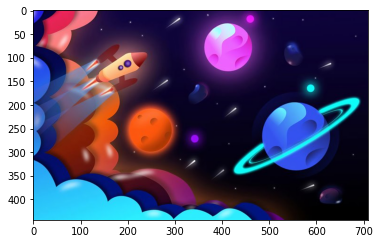

In [8]:
# verify image "works" by displaying it, after correcting color
img = cv2.imread('thumb2-abstract-space-landscape-4k-creative-planets-space-rocket.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img.shape

In [13]:
# convert from tensor to matrix
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)
twoDimage.shape

(315240, 3)

In [27]:
# run the kMeans algorithm
ret, label, center = cv2.kmeans(twoDimage, 3, None, (cv2.TERM_CRITERIA_MAX_ITER, 1000, 0), 5, cv2.KMEANS_PP_CENTERS)


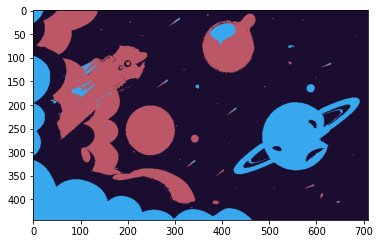

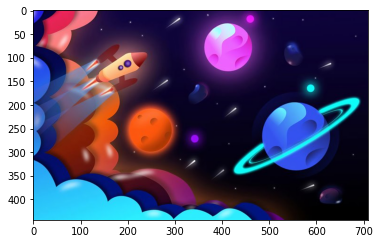

In [28]:
center = np.uint8(center)
res = center[label.flatten()]
new_img = res.reshape((img.shape))
plt.imshow(new_img)
plt.figure()
plt.imshow(img)